In [1]:
import os
os.environ['HTTP_PROXY'] = "http://127.0.0.1:10809"
os.environ['HTTPS_PROXY'] = "http://127.0.0.1:10809"

In [2]:
import geemap
import ee
Map=geemap.Map()
Map

*** Earth Engine *** FINAL DEADLINE: ee.Authenticate will fail after 2022-06-06. Please upgrade. https://developers.google.com/earth-engine/guides/python_install


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [4]:
# # 大庆市
# roi = ee.Geometry.Rectangle([123.9355, 45.8362,125.3055, 46.8762])
# # 天津市
# roi = ee.Geometry.Rectangle([115.9244, 38.6272,117.4944,39.6372])
# # 武汉市
# roi = ee.Geometry.Rectangle([113.7393, 29.8642,115.0993, 30.9242])
# # 珠三角
# roi = ee.Geometry.Rectangle([112.7614, 22.2347,114.0514, 23.2547])
# 青藏高原
roi = ee.Geometry.Rectangle([89.8826, 34.6579,91.3626, 35.8279])
Map.addLayer(roi, {}, "roi")
Map.centerObject(roi,7)

In [5]:
# 定义参数
# region = 'daqing'
# sample_region = 'DAQING'
# region = 'tianjin'
# sample_region = 'TIANJIN'
# region = 'wuhan'
# sample_region = 'WUHAN'
# region = 'prd'
# sample_region = 'PRD'
region = 'tibet'
sample_region = 'TIBET'

In [6]:
elevation = ee.Image("users/311605001111/hillshade_" + region)
def maskSR(img):
    cloudShadowBitMask = (1 << 3)
    cloudsBitMask = (1 << 5)
    snowBitMask = (1 << 4)   
    qa = img.select('pixel_qa')
    mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0) \
                   .And(qa.bitwiseAnd(cloudsBitMask).eq(0)) \
                   .And(qa.bitwiseAnd(snowBitMask).eq(0))
    azimuth = img.get('SOLAR_AZIMUTH_ANGLE')
    zenith = img.get('SOLAR_ZENITH_ANGLE')
    image = img.lt(0)
    bands = image.select('B2').add(image.select('B3')).add(image.select('B4')).add(image.select('B5')).add(image.select('B6')).add(image.select('B7'))
    outlier = bands.gt(0).remap([0,1],[1,0]).rename('outlier')
    return img.updateMask(mask).updateMask(ee.Terrain.hillShadow(elevation,azimuth,zenith,200,True)).updateMask(outlier)

# 月尺度制图

## 带底图

In [ ]:
# # 区域一
# from matplotlib import pyplot as plt
# import numpy as np
# import matplotlib
# from geemap import cartoee
# re = [124.0338, 46.0192, 124.1100, 46.0688]
# roi = ee.Geometry.Rectangle(re)
# l5 = ee.ImageCollection('LANDSAT/LT05/C01/T1_SR') \
#        .select(['B1', 'B2', 'B3', 'B4', 'B5', 'B7','pixel_qa'],['B2', 'B3', 'B4', 'B5', 'B6', 'B7','pixel_qa']) \
#        .filterBounds(roi)        
# l8 = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
#        .select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7','pixel_qa']) \
#        .filterBounds(roi)
# l58 = l8.merge(l5)
# visParams = {'bands': ['B5', 'B4', 'B3'],'min': 0,'max': 3000,'gamma': 1.4}
# # visParams = {'bands': ['B5', 'B6', 'B4'],'min': 0,'max': 3000,'gamma': 1.4}


# days_31 = [1,3,5,7,8,10,12]
# days_30 = [4,6,9,11]
# days_28 = [2]
# for month in range(1,10,1):
#     if month in days_31:
#         startDate = '2020-' + str(month) +'-01'
#         endDate = '2020-' + str(month) +'-31'
#         refer_img = l58.filterDate(startDate, endDate).map(maskSR).median().clip(roi).visualize(**visParams)
#     elif month in days_30:
#         startDate = '2020-' + str(month) +'-01'
#         endDate = '2020-' + str(month) +'-30'
#         refer_img = l58.filterDate(startDate, endDate).map(maskSR).median().clip(roi).visualize(**visParams)
#     else:
#         startDate = '2020-' + str(month) +'-01'
#         endDate = '2020-' + str(month) +'-28'
#         refer_img = l58.filterDate(startDate, endDate).map(maskSR).median().clip(roi).visualize(**visParams)
   
#     pw = ee.Image("JRC/GSW1_3/MonthlyHistory/2020_0" + str(month)).clip(roi).eq(2).rename('waterclass')
#     label = 'GSWD (2020/'+ str(month) + ")" 
#     blend = refer_img.blend(pw.selfMask().visualize(**{'palette':['blue']}))
#     fig = plt.figure(figsize=(12, 8))
#     ax = cartoee.get_map(blend, region=re)
#     cartoee.add_gridlines(ax, interval=[0.05,0.03], linestyle=":")
#     # cartoee.add_gridlines(ax, interval=[0.3,0.2], linestyle=":")
#     ax.set_title(label = label, fontsize=28)

## 不带底图

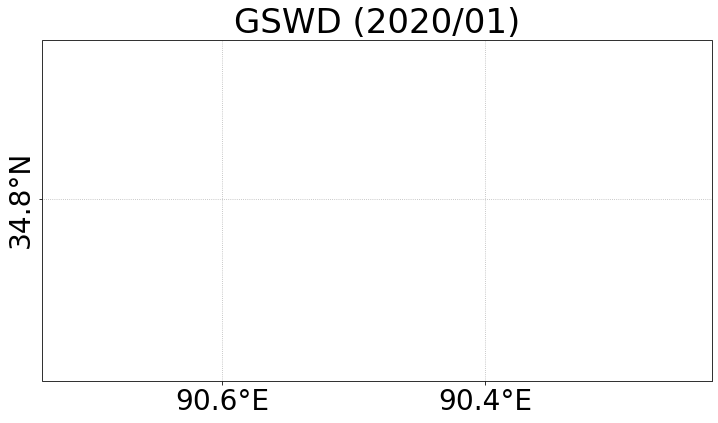

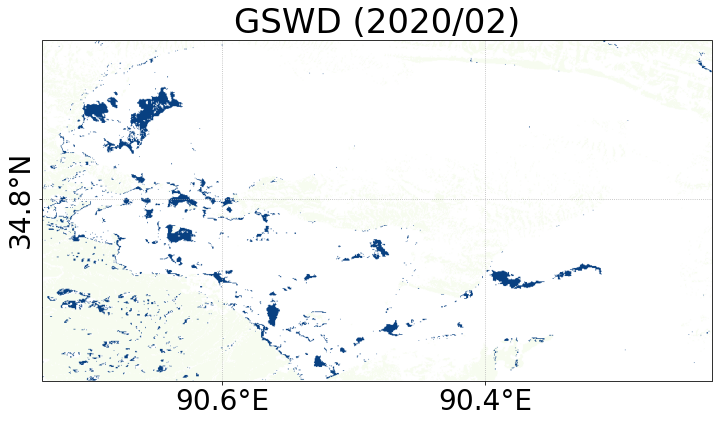

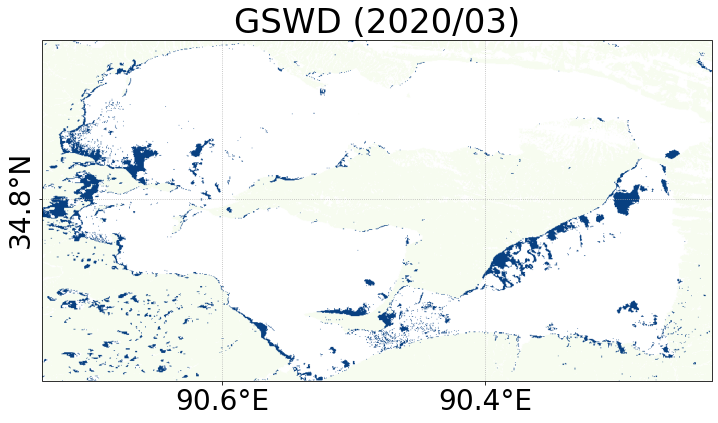

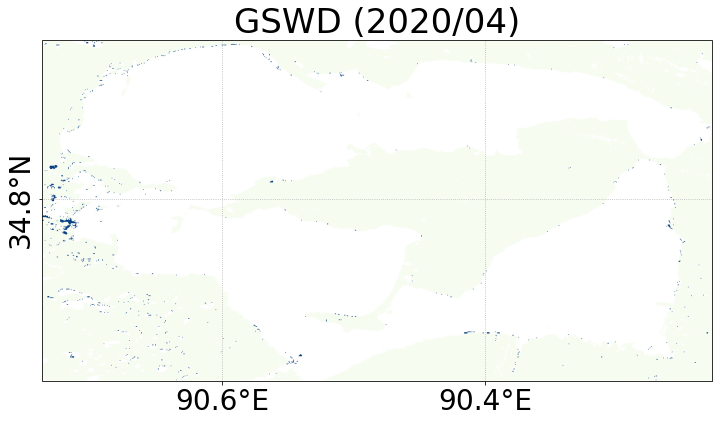

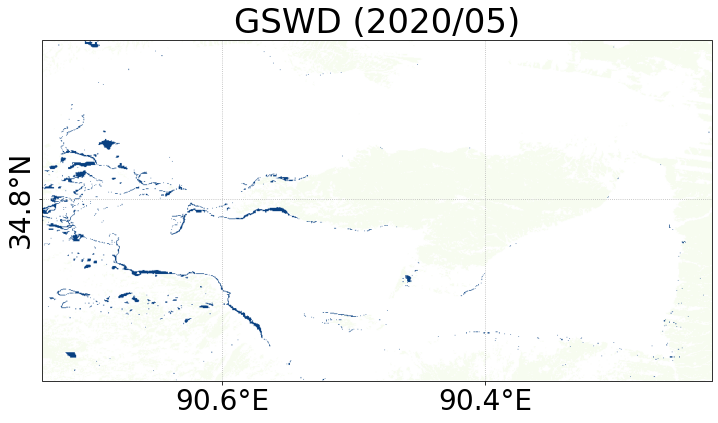

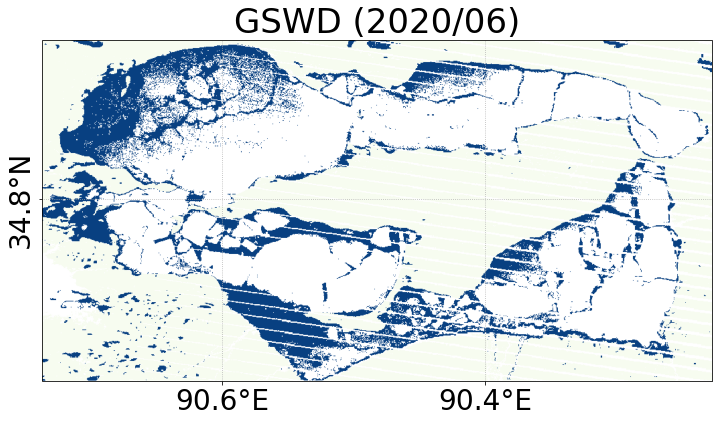

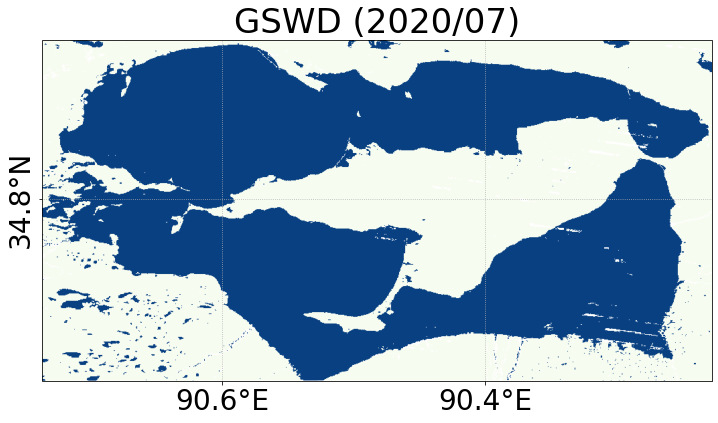

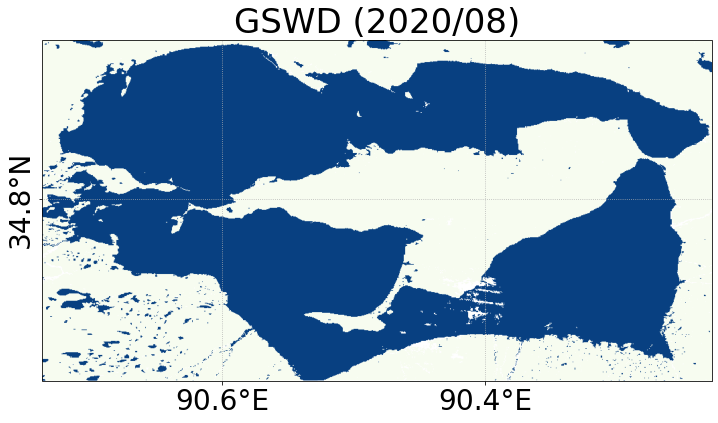

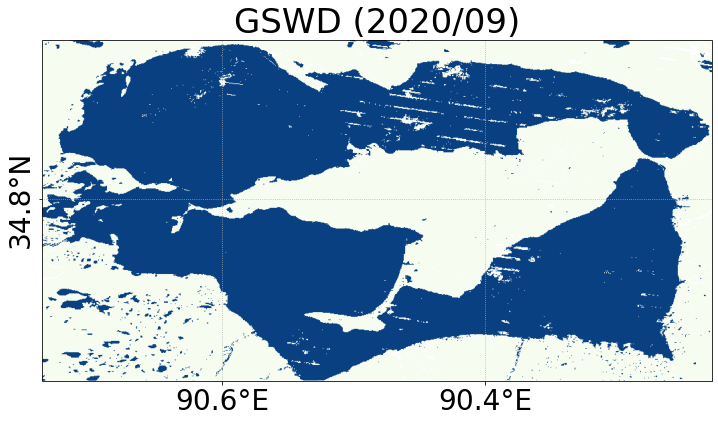

In [10]:
# 1-9月
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee
# # region A
# re = [124.0338, 46.0192, 124.1100, 46.0688]
# region E
re = [90.2278, 34.6615, 90.7370, 34.9208]
roi = ee.Geometry.Rectangle(re)

for month in range(1,10,1):
    year = '2020'
    basemap = ee.Image.constant(0).clip(roi).rename('waterclass')
    JRC = ee.Image('JRC/GSW1_3/MonthlyHistory/' + year + '_0' + str(month)).clip(roi).rename('waterclass').visualize(**{'palette':['white','#F7FCF0', '#084081'],'min':0,'max':2})
    label = 'GSWD ('+ year +'/0'+ str(month) + ")" 
    
    fig = plt.figure(figsize=(12, 8))
    ax = cartoee.get_map(JRC, region=re)
    cartoee.add_gridlines(ax, interval=[0.2,0.2], linestyle=":", ytick_rotation="vertical")
    ax.tick_params(labelsize=28)
    ax.set_title(label = label, fontsize=34)

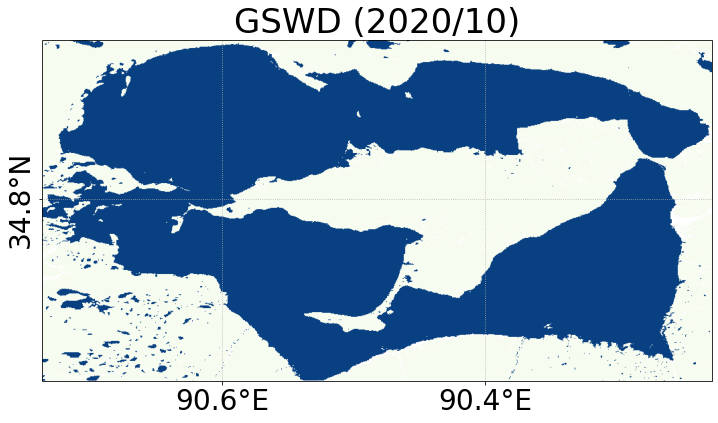

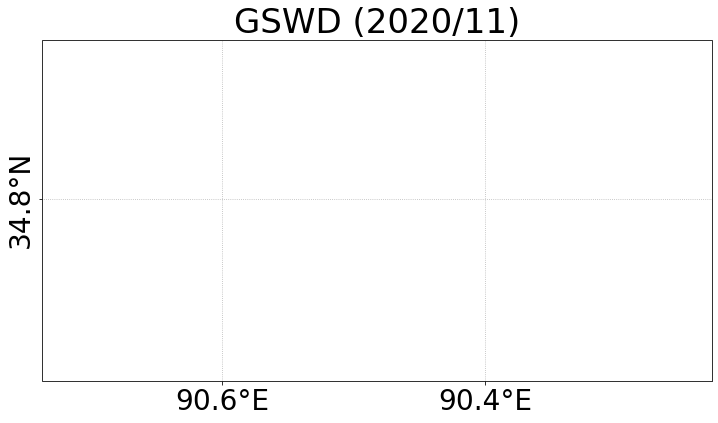

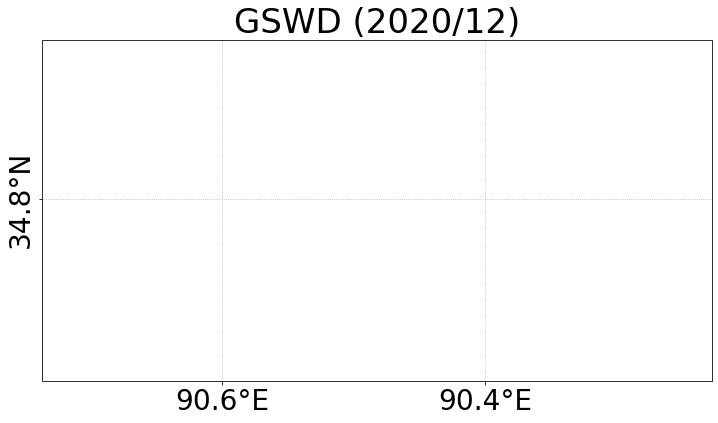

In [11]:
# 10-12月
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

# # region A
# re = [124.0338, 46.0192, 124.1100, 46.0688]
# region E
re = [90.2278, 34.6615, 90.7370, 34.9208]
roi = ee.Geometry.Rectangle(re)

for month in range(10,13,1):
    year = '2020'
    basemap = ee.Image.constant(0).clip(roi).rename('waterclass')
    JRC = ee.Image('JRC/GSW1_3/MonthlyHistory/' + year + '_' + str(month)).clip(roi).rename('waterclass').visualize(**{'palette':['white','#F7FCF0', '#084081'],'min':0,'max':2})
    label = 'GSWD ('+ year +'/'+ str(month) + ")"
    
    fig = plt.figure(figsize=(12, 8))
    ax = cartoee.get_map(JRC, region=re)
    cartoee.add_gridlines(ax, interval=[0.2,0.2], linestyle=":", ytick_rotation="vertical")
    ax.tick_params(labelsize=28)
    ax.set_title(label = label, fontsize=34)

## 全球

In [ ]:
# 区域一
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee
re = [-180, -90, 180, 90]
roi = ee.Geometry.Rectangle(re)
l5 = ee.ImageCollection('LANDSAT/LT05/C01/T1_SR') \
       .select(['B1', 'B2', 'B3', 'B4', 'B5', 'B7','pixel_qa'],['B2', 'B3', 'B4', 'B5', 'B6', 'B7','pixel_qa']) \
       .filterBounds(roi)        
l8 = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
       .select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7','pixel_qa']) \
       .filterBounds(roi)
l58 = l8.merge(l5)
visParams = {'bands': ['B5', 'B4', 'B3'],'min': 0,'max': 3000,'gamma': 1.4}
# visParams = {'bands': ['B5', 'B6', 'B4'],'min': 0,'max': 3000,'gamma': 1.4}

for month in range(10,13,1):
    basemap = ee.Image.constant(0).clip(roi).rename('waterclass')
    # JRC = ee.Image("JRC/GSW1_3/MonthlyHistory/2020" + str(month)).clip(roi).remap([0,1,2,3],[0,0,1,2]).rename('waterclass')
    JRC = ee.Image("JRC/GSW1_3/MonthlyHistory/2020_" + str(month)).rename('waterclass').visualize(**{'palette':['white','#D3D3D3', 'blue'],'min':0,'max':2})
    # pw = ee.ImageCollection([JRC,basemap]).sum()
    label = 'GSWD (2020/'+ str(month) + ")" 
    fig = plt.figure(figsize=(12, 8))
    ax = cartoee.get_map(JRC, region=re)
    cartoee.add_gridlines(ax, interval=[40,20], linestyle=":")
    # cartoee.add_gridlines(ax, interval=[0.3,0.2], linestyle=":")
    ax.set_title(label = label, fontsize=28)

# JRC WF 下载

In [ ]:
# 定义参数
# region = 'daqing'
# sample_region = 'DAQING'
# region = 'tianjin'
# sample_region = 'TIANJIN'
region = 'wuhan'
sample_region = 'WUHAN'
# region = 'prd'
# sample_region = 'PRD'
# region = 'tibet'
# sample_region = 'TIBET'

In [ ]:
# # 大庆市
# roi = ee.Geometry.Rectangle([123.9355, 45.8362,125.3055, 46.8762])
# # 天津市
# roi = ee.Geometry.Rectangle([115.9244, 38.6272,117.4944,39.6372])
# # 武汉市
roi = ee.Geometry.Rectangle([113.7393, 29.8642,115.0993, 30.9242])
# # 珠三角
# roi = ee.Geometry.Rectangle([112.7614, 22.2347,114.0514, 23.2547])
# 青藏高原
# roi = ee.Geometry.Rectangle([89.8826, 34.6579,91.3626, 35.8279])
Map.addLayer(roi, {}, "roi")
Map.centerObject(roi,7)

## 2016-2020

In [ ]:
dataset = ee.ImageCollection('JRC/GSW1_3/MonthlyHistory').filterDate('2016-01-01', '2020-12-31')

month01 = dataset.filter(ee.Filter.eq('month',1))
frequency01 = month01.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month01.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month02 = dataset.filter(ee.Filter.eq('month',2))
frequency02 = month02.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month02.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month03 = dataset.filter(ee.Filter.eq('month',3))
frequency03 = month03.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month03.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month04 = dataset.filter(ee.Filter.eq('month',4))
frequency04 = month04.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month04.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month05 = dataset.filter(ee.Filter.eq('month',5))
frequency05 = month05.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month05.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month06 = dataset.filter(ee.Filter.eq('month',6))
frequency06 = month06.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month06.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month07 = dataset.filter(ee.Filter.eq('month',7))
frequency07 = month07.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month07.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month08 = dataset.filter(ee.Filter.eq('month',8))
frequency08 = month08.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month08.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month09 = dataset.filter(ee.Filter.eq('month',9))
frequency09 = month09.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month09.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month10 = dataset.filter(ee.Filter.eq('month',10))
frequency10 = month10.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month10.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month11 = dataset.filter(ee.Filter.eq('month',11))
frequency11 = month11.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month11.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month12 = dataset.filter(ee.Filter.eq('month',12))
frequency12 = month12.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month12.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

frequency = ee.ImageCollection([frequency01,frequency02,frequency03,frequency04,frequency05,frequency06,frequency07,frequency08,frequency09,frequency10,frequency11,frequency12]).mean()
# Map.addLayer(frequency,{'palette':['white','blue'],'min':0,'max':1}, 'frequency')

dataset_id = 'JRC_' + region + '_1620'
assetID = 'users/311605001111/' + dataset_id
task = ee.batch.Export.image.toAsset(**{
    'image': frequency,
    'description': dataset_id,
    'assetId': assetID,
    'scale': 30,
    'region': roi,
    'maxPixels': 1e13,
})
task.start()

## 2011-2020

In [ ]:
dataset = ee.ImageCollection('JRC/GSW1_3/MonthlyHistory').filterDate('2011-01-01', '2020-12-31')

month01 = dataset.filter(ee.Filter.eq('month',1))
frequency01 = month01.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month01.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month02 = dataset.filter(ee.Filter.eq('month',2))
frequency02 = month02.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month02.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month03 = dataset.filter(ee.Filter.eq('month',3))
frequency03 = month03.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month03.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month04 = dataset.filter(ee.Filter.eq('month',4))
frequency04 = month04.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month04.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month05 = dataset.filter(ee.Filter.eq('month',5))
frequency05 = month05.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month05.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month06 = dataset.filter(ee.Filter.eq('month',6))
frequency06 = month06.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month06.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month07 = dataset.filter(ee.Filter.eq('month',7))
frequency07 = month07.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month07.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month08 = dataset.filter(ee.Filter.eq('month',8))
frequency08 = month08.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month08.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month09 = dataset.filter(ee.Filter.eq('month',9))
frequency09 = month09.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month09.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month10 = dataset.filter(ee.Filter.eq('month',10))
frequency10 = month10.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month10.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month11 = dataset.filter(ee.Filter.eq('month',11))
frequency11 = month11.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month11.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month12 = dataset.filter(ee.Filter.eq('month',12))
frequency12 = month12.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month12.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

frequency = ee.ImageCollection([frequency01,frequency02,frequency03,frequency04,frequency05,frequency06,frequency07,frequency08,frequency09,frequency10,frequency11,frequency12]).mean()
# Map.addLayer(frequency,{'palette':['white','blue'],'min':0,'max':1}, 'frequency')

dataset_id = 'JRC_' + region + '_1120'
assetID = 'users/311605001111/' + dataset_id
task = ee.batch.Export.image.toAsset(**{
    'image': frequency,
    'description': dataset_id,
    'assetId': assetID,
    'scale': 30,
    'region': roi,
    'maxPixels': 1e13,
})
task.start()

## 2001-2020

In [ ]:
dataset = ee.ImageCollection('JRC/GSW1_3/MonthlyHistory').filterDate('2001-01-01', '2020-12-31')

month01 = dataset.filter(ee.Filter.eq('month',1))
frequency01 = month01.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month01.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month02 = dataset.filter(ee.Filter.eq('month',2))
frequency02 = month02.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month02.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month03 = dataset.filter(ee.Filter.eq('month',3))
frequency03 = month03.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month03.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month04 = dataset.filter(ee.Filter.eq('month',4))
frequency04 = month04.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month04.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month05 = dataset.filter(ee.Filter.eq('month',5))
frequency05 = month05.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month05.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month06 = dataset.filter(ee.Filter.eq('month',6))
frequency06 = month06.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month06.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month07 = dataset.filter(ee.Filter.eq('month',7))
frequency07 = month07.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month07.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month08 = dataset.filter(ee.Filter.eq('month',8))
frequency08 = month08.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month08.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month09 = dataset.filter(ee.Filter.eq('month',9))
frequency09 = month09.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month09.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month10 = dataset.filter(ee.Filter.eq('month',10))
frequency10 = month10.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month10.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month11 = dataset.filter(ee.Filter.eq('month',11))
frequency11 = month11.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month11.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month12 = dataset.filter(ee.Filter.eq('month',12))
frequency12 = month12.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month12.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

frequency = ee.ImageCollection([frequency01,frequency02,frequency03,frequency04,frequency05,frequency06,frequency07,frequency08,frequency09,frequency10,frequency11,frequency12]).mean()
# Map.addLayer(frequency,{'palette':['white','blue'],'min':0,'max':1}, 'frequency')

dataset_id = 'JRC_' + region + '_0120'
assetID = 'users/311605001111/' + dataset_id
task = ee.batch.Export.image.toAsset(**{
    'image': frequency,
    'description': dataset_id,
    'assetId': assetID,
    'scale': 30,
    'region': roi,
    'maxPixels': 1e13,
})
task.start()

## 1999-2020

In [ ]:
dataset = ee.ImageCollection('JRC/GSW1_3/MonthlyHistory').filterDate('1999-01-01', '2020-12-31')

month01 = dataset.filter(ee.Filter.eq('month',1))
frequency01 = month01.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month01.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month02 = dataset.filter(ee.Filter.eq('month',2))
frequency02 = month02.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month02.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month03 = dataset.filter(ee.Filter.eq('month',3))
frequency03 = month03.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month03.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month04 = dataset.filter(ee.Filter.eq('month',4))
frequency04 = month04.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month04.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month05 = dataset.filter(ee.Filter.eq('month',5))
frequency05 = month05.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month05.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month06 = dataset.filter(ee.Filter.eq('month',6))
frequency06 = month06.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month06.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month07 = dataset.filter(ee.Filter.eq('month',7))
frequency07 = month07.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month07.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month08 = dataset.filter(ee.Filter.eq('month',8))
frequency08 = month08.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month08.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month09 = dataset.filter(ee.Filter.eq('month',9))
frequency09 = month09.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month09.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month10 = dataset.filter(ee.Filter.eq('month',10))
frequency10 = month10.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month10.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month11 = dataset.filter(ee.Filter.eq('month',11))
frequency11 = month11.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month11.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month12 = dataset.filter(ee.Filter.eq('month',12))
frequency12 = month12.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month12.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

frequency = ee.ImageCollection([frequency01,frequency02,frequency03,frequency04,frequency05,frequency06,frequency07,frequency08,frequency09,frequency10,frequency11,frequency12]).mean()
Map.addLayer(frequency,{'palette':['white','blue'],'min':0,'max':1}, 'frequency')

# dataset_id = 'JRC_' + region + '_9920'
# assetID = 'users/311605001111/' + dataset_id
# task = ee.batch.Export.image.toAsset(**{
#     'image': frequency,
#     'description': dataset_id,
#     'assetId': assetID,
#     'scale': 30,
#     'region': roi,
#     'maxPixels': 1e13,
# })
# task.start()

In [ ]:
occurrence9920 = ee.Image("users/311605001111/JRC/JRC_wuhan_9920").select(['waterclass'],['occurrence'])
Map.addLayer(occurrence9920,{'palette':['white','green'],'min':0,'max':1}, 'occurrence9920')

occurrence = ee.Image('JRC/GSW1_3/GlobalSurfaceWater').select('occurrence').divide(100)
Map.addLayer(occurrence.clip(roi),{'palette':['white','blue'],'min':0,'max':1}, 'occurrence')

In [ ]:
occurrence9920 = ee.Image("users/311605001111/WF/daqing_WF_9920")
Map.addLayer(occurrence9920,{'palette':['white','blue'],'min':0,'max':1}, 'occurrence9920')

pw = ee.Image("users/311605001111/WF/daqing_WF_9920")
Map.addLayer(pw.gt(0.75).selfMask(),{'palette':['red']}, 'pw')

## 1984-2020

In [ ]:
dataset = ee.ImageCollection('JRC/GSW1_3/MonthlyHistory').filterDate('1984-01-01', '2020-12-31')

month01 = dataset.filter(ee.Filter.eq('month',1))
frequency01 = month01.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month01.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month02 = dataset.filter(ee.Filter.eq('month',2))
frequency02 = month02.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month02.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month03 = dataset.filter(ee.Filter.eq('month',3))
frequency03 = month03.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month03.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month04 = dataset.filter(ee.Filter.eq('month',4))
frequency04 = month04.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month04.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month05 = dataset.filter(ee.Filter.eq('month',5))
frequency05 = month05.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month05.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month06 = dataset.filter(ee.Filter.eq('month',6))
frequency06 = month06.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month06.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month07 = dataset.filter(ee.Filter.eq('month',7))
frequency07 = month07.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month07.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month08 = dataset.filter(ee.Filter.eq('month',8))
frequency08 = month08.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month08.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month09 = dataset.filter(ee.Filter.eq('month',9))
frequency09 = month09.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month09.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month10 = dataset.filter(ee.Filter.eq('month',10))
frequency10 = month10.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month10.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month11 = dataset.filter(ee.Filter.eq('month',11))
frequency11 = month11.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month11.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

month12 = dataset.filter(ee.Filter.eq('month',12))
frequency12 = month12.map(lambda i : i.select('water').clip(roi).gt(1)).sum().divide(month12.map(lambda i : i.select('water').clip(roi).gt(0)).sum()).rename('waterclass').selfMask()

frequency = ee.ImageCollection([frequency01,frequency02,frequency03,frequency04,frequency05,frequency06,frequency07,frequency08,frequency09,frequency10,frequency11,frequency12]).mean()
Map.addLayer(frequency,{'palette':['white','blue'],'min':0,'max':1}, 'frequency')

# dataset_id = 'JRC_' + region + '_8420'
# assetID = 'users/311605001111/' + dataset_id
# task = ee.batch.Export.image.toAsset(**{
#     'image': frequency,
#     'description': dataset_id,
#     'assetId': assetID,
#     'scale': 30,
#     'region': roi,
#     'maxPixels': 1e13,
# })
# task.start()

In [ ]:
basemap = ee.Image.constant(0).clip(roi).rename('waterclass')
dataset = ee.ImageCollection('JRC/GSW1_3/MonthlyHistory').filterDate('1999-01-01', '2020-12-31')
water_pixels = dataset.map(lambda i : i.select('water').clip(roi).gt(1)).sum()
valid_pixels = dataset.map(lambda i : i.select('water').clip(roi).gt(0)).sum()
frequency = water_pixels.divide(valid_pixels).rename('waterclass')


dataset_id = 'JRC_' + region + '_9920'
assetID = 'users/311605001111/' + dataset_id
task = ee.batch.Export.image.toAsset(**{
    'image': frequency,
    'description': dataset_id,
    'assetId': assetID,
    'scale': 30,
    'region': roi,
    'maxPixels': 1e13,
})
task.start()

In [ ]:
occurrence9920 = ee.Image("users/311605001111/JRC/JRC_prd_9920").select(['waterclass'],['occurrence'])
Map.addLayer(occurrence9920,{'palette':['white','blue'],'min':0,'max':1}, 'occurrence9920')


# 制图（1999-2020）

## PW and SW

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

# item = [['region A','daqing'],['region B','tianjin'],['region C','wuhan'],['region D','prd'],['region E','tibet']]
item = [['region A','daqing','(a1)'],['region B','tianjin','(b1)'],['region C','wuhan','(c1)'],['region D','prd','(d1)'],['region E','tibet','(e1)']]
for it in item:
    if it[0] == 'region A':
        re = [123.9355, 45.8362,125.3055, 46.8762]
    elif it[0] == 'region B':
        re = [115.9244, 38.6272,117.4944,39.6372]
    elif it[0] == 'region C':
        re = [113.7393, 29.8642,115.0993, 30.9242]
    elif it[0] == 'region D':
        re = [112.7614, 22.2347,114.0514, 23.2547]   
    elif it[0] == 'region E':
        re = [89.8826, 34.6579,91.3626, 35.8279]
    
    fig = plt.figure(figsize=(12, 8))
    vis = {'min': 0,'max': 2,'palette':['#FFFFFF','#87CEFA','#0000FF']}
    
    basemap = ee.Image.constant(0).clip(ee.Geometry.Rectangle(re)).rename('waterclass')
    frequency = ee.Image('users/311605001111/JRC/' + 'JRC_' + it[1] + '_9920')
    permanent = frequency.gte(0.75).remap([0,1],[0,2]).rename('waterclass')
    season= ee.ImageCollection([frequency.gte(0.25),frequency.lt(0.75)]).sum().eq(2).rename('waterclass')
    pw = ee.ImageCollection([permanent,season,basemap]).sum().visualize(**vis)
    
    ax = cartoee.get_map(pw,region=re)
    cartoee.add_gridlines(ax, interval=[0.3,0.2], linestyle=":")
    # cartoee.add_colorbar(ax, vis,cmap = 'Blues',loc="right",label="water frequency", orientation="vertical")
    # ax.set_title(label = it[0] + ' (1999-2020)', fontsize=20)
    ax.set_title(label = it[2] + '     GSWD ' + '(' + it[0] + ' / 1999-2020)', fontsize=20)

## WF

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

item = [['region A','daqing'],['region B','tianjin'],['region C','wuhan'],['region D','prd'],['region E','tibet']]
for it in item:
    if it[0] == 'region A':
        re = [123.9355, 45.8362,125.3055, 46.8762]
    elif it[0] == 'region B':
        re = [115.9244, 38.6272,117.4944,39.6372]
    elif it[0] == 'region C':
        re = [113.7393, 29.8642,115.0993, 30.9242]
    elif it[0] == 'region D':
        re = [112.7614, 22.2347,114.0514, 23.2547]   
    elif it[0] == 'region E':
        re = [89.8826, 34.6579,91.3626, 35.8279]
    
    fig = plt.figure(figsize=(12, 8))
    vis = {'min': 0,'max': 1,'palette':['#FFFFFF','#0000FF']}
    pw = ee.Image('users/311605001111/' + 'JRC_' + it[1] + '_9920').visualize(**vis)
    ax = cartoee.get_map(pw,region=re)
    cartoee.add_gridlines(ax, interval=[0.3,0.2], linestyle=":")
    # cartoee.add_colorbar(ax, vis,cmap = 'Blues',loc="right",label="water frequency", orientation="vertical")
    # ax.set_title(label = it[0] + ' (1999-2020)', fontsize=20)
    ax.set_title(label = 'GSWD ' + '(' + it[0] + ' / 1999-2020)', fontsize=20)